In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")
from matplotlib.ticker import MaxNLocator
from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs,
                                            get_runs_paths, param_to_hash)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)
from opdynamics.utils.plotting.plotting import heat_plot
from opdynamics.model.statistics import error_curve

In [3]:
import pandas as pd

In [4]:
params = parse_experiment_params("experiments_params/large_graph_no_polarized_group_kappa_15_gamma_3_0_3_n_500_1000_2000.json")

In [5]:
table = []
for param in params:
    
    row = {
        "gamma": param["gamma"],
        "N": param["network_size"]
    }
    print(param["gamma"], param["network_size"])
    print(param_to_hash(make_tuple(param)))
    runs = get_runs_paths(param, "results/large_graph_no_polarized_group_kappa_15_gamma_3_0_3_n_500_1000_2000/")

    row["num_runs"] = len(runs)

    table.append(row)

-3 500
6adaea1bbf7ca4f69545bf07ea0dcaf394c45bec2e780aeb8b26d405918579a8
0 500
8d5ba05f11df3f1d543a280e6f47ad450ab4f5d80daba9cc5b1a66bf5ec818e1
3 500
da85e31a5bf17eb7c5af6cd0ce38f0e8412f25b3a2b7803689578abaadaa940f
-3 1000
152d701a9ba2aeea25c63fed465eb88e23f8ae89844117a43d829cb8710bda73
0 1000
5d40484b086b6dd4e2ad6a528ec94c309c8a097c499aa18369901577eadcea4a
3 1000
7ab11349c7f89d1f259d541bd8fdf4d647dfceb42052782edfae15db7af397e9
-3 2000
a28e8967e684098808c8bbebaf570247489dc51ba869672d4d5b2e6d56994e55
0 2000
4a9f19ca76fe02f7dd9819e1e5433699fceaf9a77a14b63ff5239ec87b345938
3 2000
4a7fa34c14095b8cb850eab0c6e2fbd057b2f86d2019dfd7dba06033f8a6c25d
-3 4000
9ffded89b3946ef602483eaa5f8878edc123f57845eabade3216d4a52b604273
0 4000
cb97cb9fd9f3588382ac1808e4aa901a476a93193b76e859509f4b5f97c1e8ac
3 4000
83d78137ec12cfd1ae1787c806bb785edeb07f00d76fa81b5b8ecfe1c1d633d3


In [6]:
table = pd.DataFrame(table).sort_values(["N", "gamma"])

In [7]:
table

,gamma,N,num_runs
0,-3,500,28
1,0,500,20
2,3,500,25
3,-3,1000,23
4,0,1000,22
5,3,1000,110
6,-3,2000,19
7,0,2000,7
8,3,2000,40
9,-3,4000,6


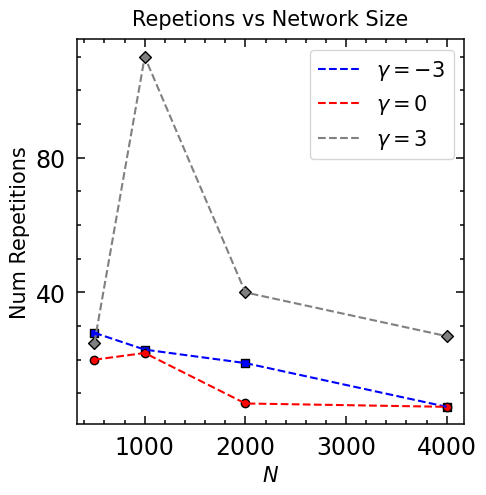

In [8]:
# parameters

nrows = 1
ncols = 1

titles = ["Repetions vs Network Size"]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Num Repetitions"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"$N$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 4
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

sub = table[table["gamma"] == -3]
axs[0].plot(
    sub["N"],
    sub["num_runs"],
    "--",
    color = "b",
    label = r'$\gamma = -3$'
)
axs[0].scatter(
    sub["N"],
    sub["num_runs"],
    marker = 's',
    color = 'b',
    edgecolors = 'k'
)

sub = table[table["gamma"] == 0]
axs[0].plot(
    sub["N"],
    sub["num_runs"],
    "--",
    color = "r",
    label = r'$\gamma = 0$'
)
axs[0].scatter(
    sub["N"],
    sub["num_runs"],
    marker = 'o',
    color = 'r',
    edgecolors = 'k'
)

sub = table[table["gamma"] == 3]
axs[0].plot(
    sub["N"],
    sub["num_runs"],
    "--",
    color = "grey",
    label = r'$\gamma = 3$'
)
axs[0].scatter(
    sub["N"],
    sub["num_runs"],
    marker = 'D',
    color = 'grey',
    edgecolors = 'k'
)
axs[0].legend(fontsize = 15)

In [17]:
params = parse_experiment_params("experiments_params/large_graph_no_polarized_group_kappa_15_gamma_3_0_3_n_500_1000_2000.json")
results = get_experiment_mean_data(params, "results/large_graph_no_polarized_group_kappa_15_gamma_3_0_3_n_500_1000_2000/")

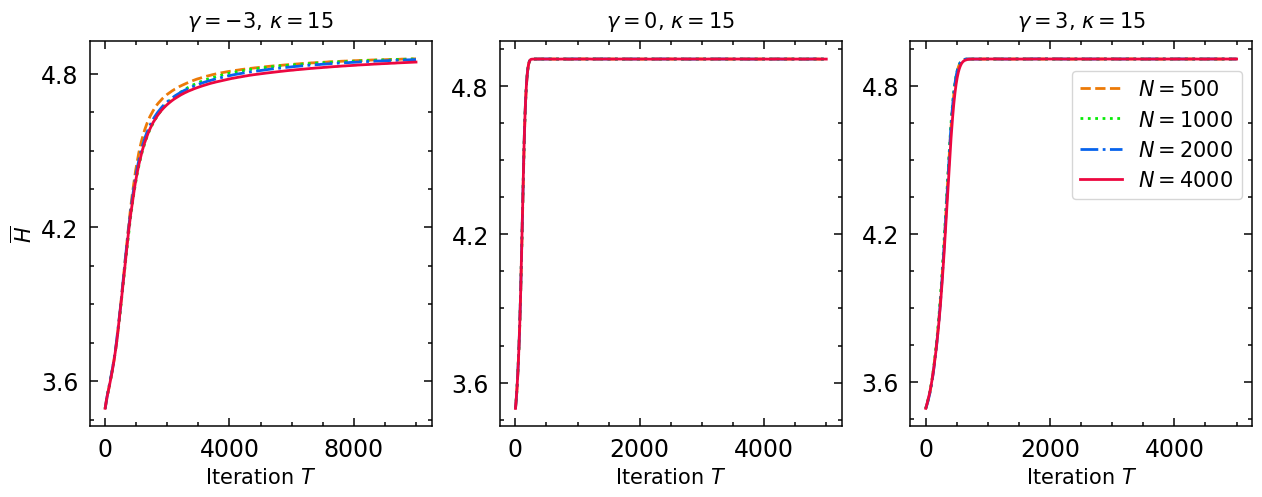

In [19]:
# parameters

nrows = 1
ncols = 3

titles = [rf"$\gamma = {k}$, $\kappa = 15$" for k in [-3, 0, 3]]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# plot
line_width = 2

measure = 'entropy'

kappa_color = {
    0: "#2e2b28",
    15: "#32BD68",
    25: "#b04238"
}


X = np.arange(1, 10000 + 1)
X_short = np.arange(1, 5000 + 1)

###
params_ = [x for x in params if x["network_size"] == 500]
selected_params = [x for x in params_ if x['gamma'] == -3]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p)][measure], c = "#ec7a07", linewidth = line_width, linestyle = '--')
selected_params = [x for x in params_ if x['gamma'] == 0]
for p in selected_params:
    axs[1].plot(X_short, results[make_tuple(p)][measure][:5000], c = "#ec7a07", linewidth = line_width, linestyle = '--')
selected_params = [x for x in params_ if x['gamma'] == 3]
for p in selected_params:
    axs[2].plot(X_short, results[make_tuple(p)][measure][:5000], c = "#ec7a07", linewidth = line_width, label = rf"$N = 500$", linestyle = '--')


params_ = [x for x in params if x["network_size"] == 1000]
selected_params = [x for x in params_ if x['gamma'] == -3]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p)][measure], c = "#07ec07", linewidth = line_width, linestyle = ':')
selected_params = [x for x in params_ if x['gamma'] == 0]
for p in selected_params:
    axs[1].plot(X_short, results[make_tuple(p)][measure][:5000], c = "#07ec07", linewidth = line_width, linestyle = ':')
selected_params = [x for x in params_ if x['gamma'] == 3]
for p in selected_params:
    axs[2].plot(X_short, results[make_tuple(p)][measure][:5000], c = "#07ec07", linewidth = line_width, label = rf"$N = 1000$", linestyle = ':')

params_ = [x for x in params if x["network_size"] == 2000]
selected_params = [x for x in params_ if x['gamma'] == -3]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p)][measure], c = "#0763ec", linewidth = line_width, linestyle = '-.')
selected_params = [x for x in params_ if x['gamma'] == 0]
for p in selected_params:
    axs[1].plot(X_short, results[make_tuple(p)][measure][:5000], c = "#0763ec", linewidth = line_width, linestyle = '-.')
selected_params = [x for x in params_ if x['gamma'] == 3]
for p in selected_params:
    axs[2].plot(X_short, results[make_tuple(p)][measure][:5000], c ="#0763ec", linewidth = line_width, label = rf"$N = 2000$", linestyle = '-.')

params_ = [x for x in params if x["network_size"] == 4000]
selected_params = [x for x in params_ if x['gamma'] == -3]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p)][measure], c = "#ec0740", linewidth = line_width, linestyle = '-')
selected_params = [x for x in params_ if x['gamma'] == 0]
for p in selected_params:
    axs[1].plot(X_short, results[make_tuple(p)][measure][:5000], c = "#ec0740", linewidth = line_width, linestyle = '-')
selected_params = [x for x in params_ if x['gamma'] == 3]
for p in selected_params:
    axs[2].plot(X_short, results[make_tuple(p)][measure][:5000], c ="#ec0740", linewidth = line_width, label = rf"$N = 4000$", linestyle = '-')

axs[2].legend(loc = 'upper right', fontsize = 15, bbox_to_anchor = (1, 0.95))

# fig.savefig("temp.png")